<a href="https://colab.research.google.com/github/MegaDewi2/Prediksi-Harga-Alpukat-/blob/main/Visualisasi_dan_Prediksi_harga_alpukat_menggunakan_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing



In [ ]:
'''
import library 
'''
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [ ]:
'''
memasukkan dataset dengan read_csv pada library pandas
'''
df = pd.read_csv('avocado-updated-2020.csv')
df.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [ ]:
df.dtypes

date              object
average_price    float64
total_volume     float64
4046             float64
4225             float64
4770             float64
total_bags       float64
small_bags       float64
large_bags       float64
xlarge_bags      float64
type              object
year               int64
geography         object
dtype: object

In [ ]:
'''
Mengganti tipe data dari kolom date dan membuat kolom Month dan Day
'''
df['date']=pd.to_datetime(df['date'])
df['Month']=df['date'].apply(lambda x:x.month)
df['Day']=df['date'].apply(lambda x:x.day)

In [ ]:
new_df = df.rename(columns={'4046':'small', '4225':'large', '4770':'xlarge'})
new_df.head()

,date,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,Month,Day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,1,4


Text(0.5, 1.0, 'Distribution of Final Grades')

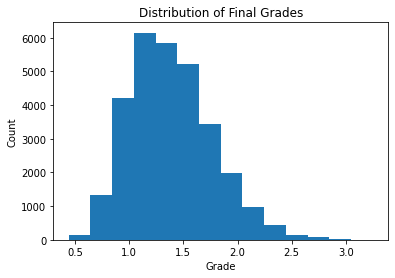

In [ ]:
plt.hist(new_df['average_price'], bins = 14)
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Final Grades')


In [ ]:
'''
cek tipe data dari setaip kolom
'''
new_df.dtypes

date             datetime64[ns]
average_price           float64
total_volume            float64
small                   float64
large                   float64
xlarge                  float64
total_bags              float64
small_bags              float64
large_bags              float64
xlarge_bags             float64
type                     object
year                      int64
geography                object
Month                     int64
Day                       int64
dtype: object

In [ ]:
'''
rangkuman statistik dari dataset
'''
new_df.describe()

,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,year,Month,Day
count,30021.000000,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,3.002100e+04,30021.000000,30021.000000,30021.000000
mean,1.390930,9.392546e+05,2.991073e+05,2.849014e+05,2.162937e+04,3.335336e+05,2.321256e+05,9.518529e+04,6.222717e+03,2017.205123,6.176077,15.417175
std,0.381347,3.813519e+06,1.289108e+06,1.169078e+06,1.009188e+05,1.415618e+06,9.505028e+05,4.672104e+05,3.813737e+04,1.570133,3.439344,8.809482
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015.000000,1.000000,1.000000
25%,1.110000,1.429853e+04,7.827800e+02,2.814000e+03,0.000000e+00,8.373820e+03,5.955980e+03,3.515900e+02,0.000000e+00,2016.000000,3.000000,8.000000
50%,1.350000,1.242047e+05,1.052276e+04,2.456722e+04,1.867500e+02,5.039131e+04,3.425532e+04,5.171120e+03,0.000000e+00,2017.000000,6.000000,15.000000
75%,1.630000,4.898029e+05,1.151556e+05,1.409472e+05,5.424160e+03,1.591742e+05,1.129384e+05,3.606762e+04,5.600000e+02,2019.000000,9.000000,23.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,3.168919e+07,2.055041e+07,1.332760e+07,1.022564e+06,2020.000000,12.000000,31.000000


In [ ]:
'''
cek missing value disetiap kolom
'''
new_df.isnull().sum()

date             0
average_price    0
total_volume     0
small            0
large            0
xlarge           0
total_bags       0
small_bags       0
large_bags       0
xlarge_bags      0
type             0
year             0
geography        0
Month            0
Day              0
dtype: int64

## Visualization

In [ ]:
  '''
membuat line chart untuk melihat rata-rata harga berdasarkan tanggal
'''
fig = go.Figure(data=go.Scatter(x=new_df.date, y=new_df.average_price))

fig.update_layout(title='Average Price (2015-2020)', 
                  xaxis_title = 'Date',
                  yaxis_title = 'Average Price')
 
fig.show() 

conventional    15012
organic         15009
Name: type, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



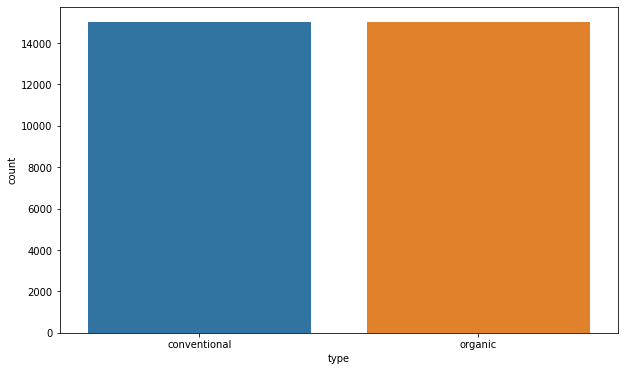

In [ ]:
'''
membuat countplot untuk melihat jumlah dari masing-masing tipe alpukat
'''
print(new_df['type'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(new_df['type'])
plt.show()

In [ ]:
data = go.Pie(labels=new_df['type'],values=new_df['average_price'])
fig = go.Figure(data=data)
iplot(fig)

In [ ]:
data = go.Pie(labels=new_df['type'],values=new_df['total_volume'])
fig = go.Figure(data=data)
iplot(fig)

Text(0.5, 1.0, 'Harga rata-rata Tipe alpukat setiap daerah')

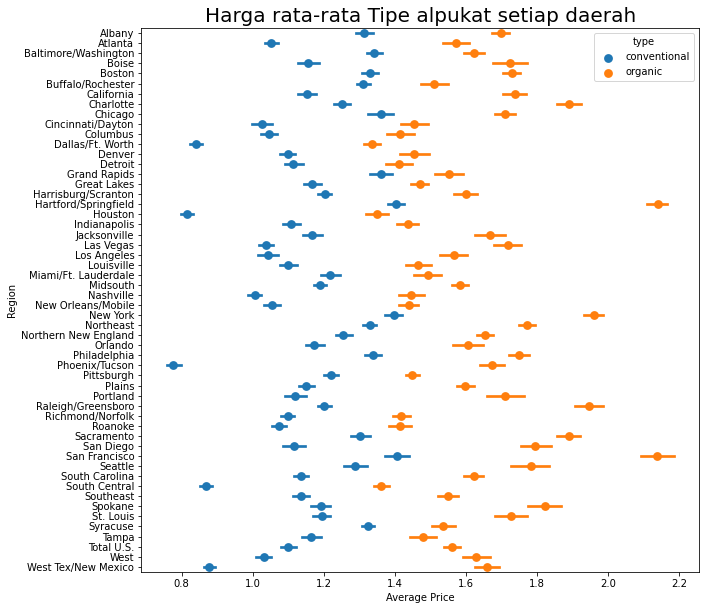

In [ ]:
'''
membuat pointplot untuk melihat harga rata-rata tipe alpukat dari setiap daerah
'''
plt.figure(figsize=(10,10))
sns.pointplot(x='average_price',y='geography',data=new_df, hue='type',join=False)

plt.xlabel('Average Price')
plt.ylabel('Region')
plt.title("Harga rata-rata Tipe alpukat setiap daerah",{'fontsize':20})

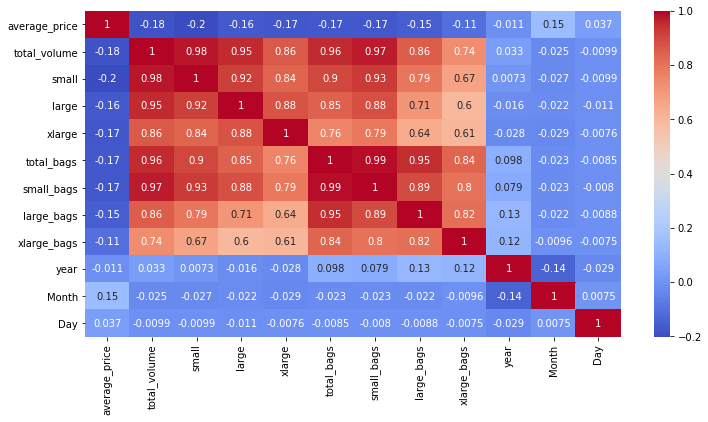

In [ ]:
'''
membuat heatmap untuk melihat korelasi antar kolom
'''
plt.figure(figsize=(12,6))
sns.heatmap(new_df.corr(),cmap='coolwarm',annot=True)

# Train Test Split

In [ ]:
new_df['geography'].nunique()

54

In [ ]:
new_df['type'].nunique()

2

In [ ]:
'''
mengubah kolom yang berisi kategorikal dengan get_dummies, dan menghapus kolom geograpy dan date
'''
df_final=pd.get_dummies(new_df.drop(['geography','date'],axis=1),drop_first=True)
df_final.head()

,average_price,total_volume,small,large,xlarge,total_bags,small_bags,large_bags,xlarge_bags,year,Month,Day,type_organic
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,2015,1,4,0
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,2015,1,4,1
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,2015,1,4,0
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,2015,1,4,1
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,2015,1,4,0


In [ ]:
'''
mendeklarasikan nilai x merupakan kolom index ke-1 sampai kolom index ke-13 dan nilai y merupakan harga rata-rata dari alpukat
'''
X = df_final.iloc[:,1:14]
y = df_final['average_price']

In [ ]:
'''
membagi data menjadi training set dan testing set menggunakan method train_test_split
'''
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) 

# Linear Regression

In [ ]:
'''
mengimport library linear regression dari sklearn
'''
from sklearn.linear_model import LinearRegression
'''
Membuat object LinearRegression dan mentraining data dengan training set
'''
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
'''
melihat nilai pengaruh setiap kolom terhadap average price
'''
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
total_volume,-0.000003
small,0.000002
large,0.000003
xlarge,0.000002
total_bags,0.004270
small_bags,-0.004268
large_bags,-0.004268
xlarge_bags,-0.004266
year,0.001609
Month,0.015992


In [ ]:
'''
Memprediksi hasil regressor X_test
'''
y_pred = regressor.predict(X_test)
y_pred

array([1.61369598, 1.24323654, 1.14112228, ..., 1.1763354 , 0.86553567,
       1.61175596])

In [ ]:
'''
menampilkan hasil prediksi
'''
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2.head()

,Actual,Predicted
13724,2.07,1.613696
26461,1.42,1.243237
17497,1.12,1.141122
12143,1.26,1.088997
4605,1.47,1.696201


In [ ]:
var = np.var(df2)
var

Actual       0.142363
Predicted    0.059949
dtype: float64

In [ ]:
'''
Evaluasi performa dari algoritma yaitu dengan mencari nilai dari MAE, MSE, RMSE
'''
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.22171940399759985
Mean Squared Error: 0.08259023709561347
Root Mean Squared Error: 0.28738517201764857


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [ ]:
df3 = pd.DataFrame({'Actual': y_test, 'Predicted': pred})
df3.head()

,Actual,Predicted
13724,2.07,1.9341
26461,1.42,1.3534
17497,1.12,1.0773
12143,1.26,0.9955
4605,1.47,1.6253


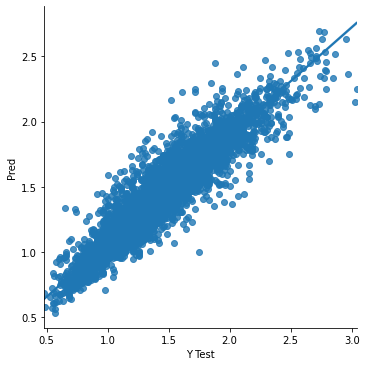

In [ ]:
data = pd.DataFrame({'Y Test':y_test , 'Pred':pred},columns=['Y Test','Pred'])
sns.lmplot(x='Y Test',y='Pred',data=data)


In [ ]:
var2 = np.var(df3)
var2

Actual       0.142363
Predicted    0.111438
dtype: float64

In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

Mean Absolute Error: 0.09718522897585344
Mean Squared Error: 0.01850946822814321
Root Mean Squared Error: 0.13604950653399375


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13655620316402997
MSE: 0.042492522897585344
RMSE: 0.20613714584612194
